In [ ]:
!pip install wget

In [ ]:
import sys
import os
from bs4 import BeautifulSoup
import requests
import re
import wget
import zipfile


def find_files(url):
    # get a soup of the directory url
    soup = BeautifulSoup(requests.get(url).text, features="html.parser")

    # make a list of all the links in the url
    hrefs_list = []
    for link in soup.find_all('a'):
        hrefs_list.append(link.get('href'))

    return hrefs_list
    
    
def download_file(download_file_url, file_dir, output=False):
    if output:
        # print it is downloading
        print('Downloading: '+ download_file_url)
    # download the file to the directory
    wget.download(download_file_url, file_dir)
    
    
# needs a directory to download it to
def download_epileptologie(DIR, output=False):
    
    # directory url
    front_url = 'http://epileptologie-bonn.de/cms/front_content.php?idcat=193&lang=3&changelang=3'
    dir_url = 'http://epileptologie-bonn.de/cms'

    hrefs_dir_list = find_files(front_url)
    
    # for each link in the directory
    for link in hrefs_dir_list:
        # download the files outside of participant folders we want
        if re.findall('zip', str(link)):
            # if the file doesnt already exist in the directory
            if not os.path.exists(os.path.join(DIR, link)):
                download_file(dir_url+'/'+str(link), DIR, output)
                zip_file_name = link.split('/')[-1]
                zip_ref = zipfile.ZipFile(os.path.join(DIR, zip_file_name), 'r')
                zip_ref.extractall(os.path.join(DIR, zip_file_name[0]))
                zip_ref.close()
                os.remove(os.path.join(DIR, zip_file_name))

In [ ]:
DOWNLOAD_DIR = "Epileptologie Database"

if not os.path.exists(DOWNLOAD_DIR):
  os.makedirs(DOWNLOAD_DIR)
  download_epileptologie(DOWNLOAD_DIR, output=True)

else:
  print("Already Downloaded")

Already Downloaded


In [ ]:
# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
  
print(color.BOLD+color.UNDERLINE+'Title'+color.END)

Title


In [ ]:
import glob            # for file locations
import pprint          # for pretty printing
import re

pp = pprint.PrettyPrinter()

def file_list(folder_path, output=False):
    # create an empty list
    file_list = []
    # for file name in the folder path...
    for filename in glob.glob(folder_path):
        # ... append it to the list
        file_list.append(filename)
        
    # sort alphabetically
    file_list.sort()
    
    # Output
    if output:
        print(str(len(file_list)) + " files found")
        pp.pprint(file_list)
    
    return file_list

In [ ]:
# get folder lists
EPIL_dir_file_list = file_list(os.path.join(DOWNLOAD_DIR, '*'), output=True)

0 files found
[]


In [ ]:
epil_baseline_file = os.path.join(EPIL_dir_file_list[0], 'F060.txt')
epil_seizure_file = os.path.join(EPIL_dir_file_list[3], 'S033.txt')

In [ ]:
import pandas as pd     # dataframes
import re

def data_load(file_path, output=False):

    # read in the datafile
    data = pd.read_csv(file_path,                 # file in
                       header=None,               # no column names at top of file
                       dtype=float)               # read data as 'floating points' (e.g. 1.0)

    if output:
        print(color.BOLD+color.UNDERLINE+'\n'+re.findall('\w\d+',file_path)[0]+color.END)
        # Output detailed information on the data
        print(color.BOLD+'\nData Information'+color.END)
        data.info()

        # Output first 5 rows and columns
        print(color.BOLD+'\nDataframe Head'+color.END)
        display(data.head())
        
    return data
        

epil_baseline_df = data_load(epil_baseline_file, output=True)
epil_seizure_df = data_load(epil_seizure_file, output=True)


F060

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4097 entries, 0 to 4096
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4097 non-null   float64
dtypes: float64(1)
memory usage: 32.1 KB

Dataframe Head


,0
0,162.0
1,164.0
2,164.0
3,154.0
4,139.0



S033

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4097 entries, 0 to 4096
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4097 non-null   float64
dtypes: float64(1)
memory usage: 32.1 KB

Dataframe Head


,0
0,216.0
1,182.0
2,146.0
3,128.0
4,116.0


In [ ]:
pip install mne

     |████████████████████████████████| 7.0MB 5.3MB/s 


In [ ]:
import mne 

channel_name= ['CZ']
channel_type = ['eeg']
sample_rate = 173.61 # in hz

# create an mne info file with meta data about the EEG
info = mne.create_info(ch_names=channel_name, sfreq=sample_rate, 
                       ch_types=channel_type)

# show the info file
display(info)

<Info | 7 non-empty values
 bads: []
 ch_names: CZ
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 86.8 Hz
 meas_date: unspecified
 nchan: 1
 projs: []
 sfreq: 173.6 Hz
>

In [ ]:
 def mne_object(data, info, output=False):
    data = data.apply(lambda x: x*1e-6)
    # transpose the data
    data_T = data.transpose()
    # create raw mne object
    raw = mne.io.RawArray(data_T, info)
    
    return raw

epil_baseline_mne = mne_object(epil_baseline_df, info, output=True)
epil_seizure_mne = mne_object(epil_seizure_df, info)

Creating RawArray with float64 data, n_channels=1, n_times=4097
    Range : 0 ... 4096 =      0.000 ...    23.593 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=4097
    Range : 0 ... 4096 =      0.000 ...    23.593 secs
Ready.


Inter-Ictal
Setting up band-pass filter from 0.53 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.53, 40.00 Hz: -6.02, -6.02 dB



/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


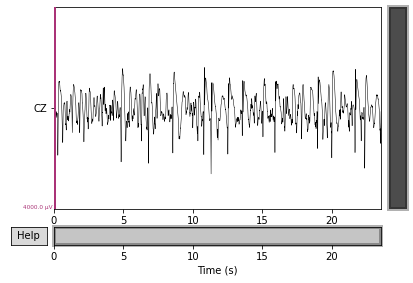

Ictal
Setting up band-pass filter from 0.53 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.53, 40.00 Hz: -6.02, -6.02 dB



/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


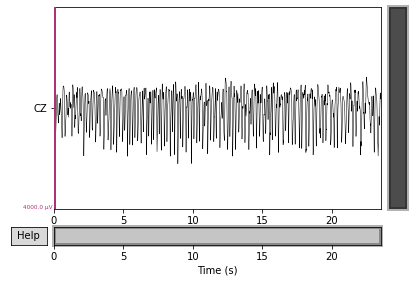

In [ ]:
plot_kwargs = {
    'scalings': dict(eeg=20e-4),   # zooms the plot out
    'highpass': 0.53,              # filters out low frequencies
    'lowpass': 40.,                # filters out high frequencies
    'n_channels': 1,               # just plot the one channel
    'duration': 24                 # number of seconds to plot
}

print(color.BOLD+color.UNDERLINE+"Inter-Ictal"+color.END)
epil_baseline_mne.plot(**plot_kwargs)
print(color.BOLD+color.UNDERLINE+"Ictal"+color.END)
epil_seizure_mne.plot(**plot_kwargs);

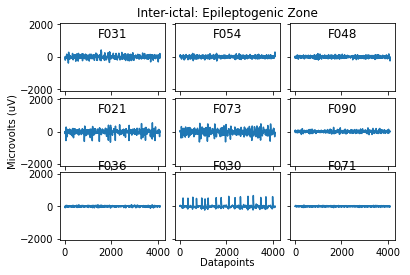

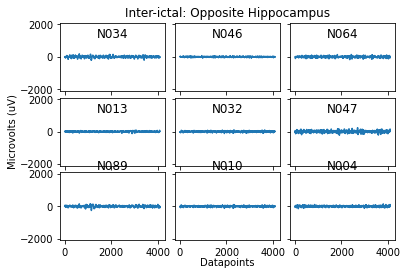

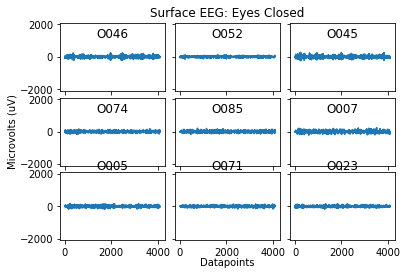

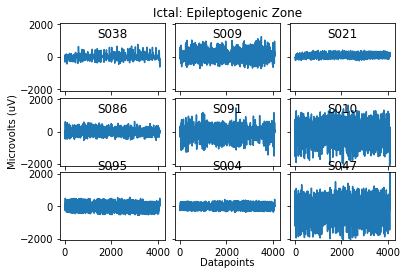

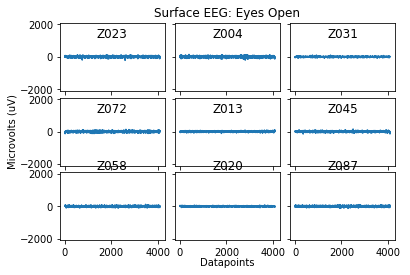

In [ ]:
import random
import matplotlib.pyplot as plt
from scipy import signal

for directory in EPIL_dir_file_list:
  #if re.findall('N|F|S',directory[-1]):
  # make a list of all the files in the directory
  files = file_list(os.path.join(directory, '*'))
  # randomly select 9 files from the list
  sampled_files = random.sample(files, 9)


  fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
  x=0
  y=0
  for file in sampled_files:

      # read in the datafile
      data = pd.read_csv(file,                      # file in
                          header=None,               # no column names at top of file
                          dtype=float)               # read data as 'floating points' (e.g. 1.0)

      # filter the data
      b, a = signal.butter(4, [1/(sample_rate/2), 30/(sample_rate/2)], 'bandpass', analog=False)
      filt_data = signal.filtfilt(b, a, data.T).T
      
      axs[x, y].plot(filt_data)
      axs[x, y].set_title(re.findall('\w\d+', file)[0], pad =-15)
      # plot all of them on the same scale
      axs[x, y].set_ylim([-2100, 2100])

      x+=1

      if x == 3:
          y +=1
          x=0


  # add a big axes, hide frame
  fig.add_subplot(111, frameon=False)
  # hide tick and tick label of the big axes
  plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
  plt.grid(False)
  plt.xlabel("Datapoints", labelpad =0.5)
  plt.ylabel("Microvolts (uV)", labelpad =20)
  plt.subplots_adjust(wspace=0.1, hspace=0.1)    

  if directory[-1] == 'N':
      plt.title('Inter-ictal: Opposite Hippocampus')

  elif directory[-1] == 'F':
      plt.title('Inter-ictal: Epileptogenic Zone')

  elif directory[-1] == 'S':
      plt.title('Ictal: Epileptogenic Zone')
  
  elif directory[-1] == 'Z':
      plt.title('Surface EEG: Eyes Open')
  
  elif directory[-1] == 'O':
      plt.title('Surface EEG: Eyes Closed')

  plt.show()

In [ ]:
!pip install matplotlib pandas numpy scipy seaborn mne
!pip install beautifulsoup4 requests wget
!pip install h5py tables kaggle
!pip install wfdb pyEDFlib PyWavelets

     |████████████████████████████████| 143kB 3.7MB/s 
     |████████████████████████████████| 1.3MB 17.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pyEDFlib: filename=pyEDFlib-0.1.22-cp37-cp37m-linux_x86_64.whl size=1520536 sha256=615419428a4cc084f5f2a34f031c576c81bee71db72eaf439e1d5826e6f406b8
  Stored in directory: /root/.cache/pip/wheels/30/47/cc/d8725129b678c85e470f577e8fcac31e176e639deb64f9dcc1
Successfully built pyEDFlib


In [ ]:
dirA="/content/Epileptologie Database/F/"
tempA = []
for file in os.listdir(dirA):
    fl = dirA + file
    tempA.append(fl)
tempA = sorted(tempA)    # class: 1     val:  -1


dirB="/content/Epileptologie Database/N/"
tempB = []
for file in os.listdir(dirB):
    fl = dirB + file
    tempB.append(fl)
tempB = sorted(tempB)    # class: 1     val:  -1

dirC="/content/Epileptologie Database/O/"
tempC = []
for file in os.listdir(dirC):
    fl = dirC + file
    tempC.append(fl)
tempC = sorted(tempC)   # class:2       val: 0
    
dirE="/content/Epileptologie Database/S/"
tempE = []
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)   # class: 3        val: 1

dirF="/content/Epileptologie Database/Z/"
tempF = []
for file in os.listdir(dirE):
    fl = dirE + file
    tempF.append(fl)
tempF = sorted(tempF)   # class: 3        val: 1

In [ ]:
ta=[]
st = 'A'
for i in range(len(tempA)):
    x = pd.read_table(tempA[i],header=None)
    x.columns=[st+str(i)]
    tb.append(x)

tb=[]
st = 'A'
for i in range(len(tempB)):
    x = pd.read_table(tempB[i],header=None)
    x.columns=[st+str(i)]
    tb.append(x)
    
tc=[]
st = 'A'
for i in range(len(tempC)):
    x = pd.read_table(tempC[i],header=None)
    x.columns=[st+str(i)]
    tc.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_table(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

tf=[]
st = 'A'
for i in range(len(tempF)):
    x = pd.read_table(tempF[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

In [ ]:
def table(table):
    big_table = None
    for ta in table:
        big_table = pd.concat([big_table, ta],axis=1)
    return big_table

In [ ]:
bigA = table(ta)
bigB = table(tb)
bigC = table(tc)
bigE = table(te)
bigF = table(tf)
head = list(bigB.columns.values)

In [ ]:
len(bigB.columns)

100

In [ ]:
bigB.head(10)

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,...,A60,A61,A62,A63,A64,A65,A66,A67,A68,A69,A70,A71,A72,A73,A74,A75,A76,A77,A78,A79,A80,A81,A82,A83,A84,A85,A86,A87,A88,A89,A90,A91,A92,A93,A94,A95,A96,A97,A98,A99
0,-42,50,-54,9,-76,-148,-27,-64,74,-41,34,-31,36,-104,-55,39,-132,29,-3,-63,9,4,1,108,-19,-16,-9,2,-37,-83,5,-58,-26,-55,-54,24,-77,-4,-57,-23,...,6,-1,24,23,1,-39,15,-43,37,28,24,-34,-31,39,-29,-63,23,-11,118,-41,47,1,-63,26,4,-3,3,40,-69,-37,7,-108,-11,133,38,-92,-82,-11,13,-62
1,-39,48,-56,-2,-10,-155,-26,-73,92,-35,31,-36,42,-100,-64,35,-154,27,-2,-71,8,-2,5,109,-23,-13,-10,-1,-35,-84,-5,-54,-21,-64,-62,31,-78,-6,-70,-18,...,6,1,19,19,-4,-36,25,-57,40,33,30,-22,-36,36,-28,-70,-19,3,121,-40,45,12,-61,26,3,4,3,47,-75,-44,30,-120,-9,129,56,-85,-82,-23,22,-64
2,-35,45,-57,-9,31,-156,-19,-79,94,-28,29,-35,50,-94,-91,35,-171,20,-6,-77,12,-6,7,91,-23,-15,-9,-6,-40,-82,-7,-49,-8,-70,-65,38,-73,-6,-78,-18,...,1,-1,14,10,-3,-39,25,-86,47,26,46,-9,-44,35,-27,-78,-73,0,114,-39,40,18,-60,15,15,18,6,51,-80,-48,16,-137,-11,124,75,-68,-83,-22,29,-62
3,-35,41,-63,-17,44,-156,-13,-78,99,-23,19,-33,55,-87,-92,38,-203,10,-16,-72,5,-8,1,79,-28,-9,-16,-5,-31,-69,-8,-43,6,-73,-66,49,-63,-1,-67,-22,...,-9,5,7,8,-1,-43,32,-106,48,24,35,-6,-48,35,-22,-88,-109,5,106,-76,35,30,-53,9,1,24,12,53,-80,-46,10,-132,-8,102,85,-67,-82,-31,38,-59
4,-36,47,-60,-18,7,-150,-8,-80,91,-20,16,-35,56,-87,-80,44,-186,2,-25,-74,14,-12,9,85,-24,-5,-17,-10,-24,-63,-6,-44,28,-77,-65,56,-50,-11,-57,-19,...,-23,-1,-1,0,6,-42,38,-106,46,18,43,-6,-52,34,-17,-93,-117,19,104,-104,30,26,-48,-4,-8,22,15,48,-83,-45,17,-113,-4,99,83,-99,-79,-30,41,-57
5,-37,51,-53,-16,-55,-147,-1,-72,65,-22,12,-30,58,-87,-84,55,-170,-8,-39,-71,23,-11,6,105,-18,-4,-13,-10,-12,-53,1,-47,39,-71,-66,59,-46,-22,-57,-16,...,-30,-3,-6,-6,16,-47,39,-120,44,3,40,-6,-57,29,-6,-105,-133,26,93,-111,31,23,-51,-16,-19,18,23,41,-83,-47,23,-90,0,106,94,-121,-75,-38,45,-63
6,-37,53,-43,-16,-51,-141,5,-75,42,-28,3,-30,60,-88,-67,61,-154,-10,-55,-70,25,-21,13,114,-14,-1,-16,-10,-16,-55,3,-49,50,-69,-65,60,-38,-13,-57,-21,...,-26,-3,-3,-13,19,-39,35,-111,47,-12,39,-14,-62,24,-1,-115,-151,37,91,-95,36,20,-54,-21,-15,19,25,40,-85,-47,42,-87,-3,110,97,-146,-68,-31,43,-67
7,-39,40,-29,-33,-40,-135,6,-75,28,-33,-1,-23,61,-90,-49,65,-119,-13,-66,-74,23,-31,20,127,-13,-3,-16,-12,-9,-67,5,-52,50,-74,-71,58,-25,-13,-54,-13,...,-27,3,-2,-17,22,-31,25,-88,53,-22,26,-11,-67,19,-5,-121,-159,31,68,-81,40,25,-59,-20,-12,13,26,47,-81,-53,31,-99,-4,114,98,-120,-68,-29,37,-61
8,-36,37,-25,-50,-11,-131,6,-76,12,-30,-5,-15,55,-83,-33,61,-113,-22,-73,-72,19,-45,29,134,-14,0,-14,-12,-14,-85,0,-60,59,-76,-77,53,-2,-6,-43,-14,...,-20,12,-3,-33,23,-12,19,-81,52,-26,2,-9,-73,17,-5,-128,-199,41,49,-98,38,24,-64,-19,-13,13,22,53,-76,-58,34,-97,-2,99,100,-99,-64,-32,32,-56
9,-22,25,-16,-56,-23,-124,5,-68,6,-31,-8,-14,51,-75,-41,66,-91,-25,-83,-67,21,-61,29,135,-20,-1,-15,-9,-18,-99,-3,-64,63,-74,-83,48,15,-14,-41,-9,...,-16,16,0,-44,36,2,12,-90,54,-32,-15,-14,-72,17,-15,-130,-225,42,26,-94,43,36,-69,-13,-13,3,23,55,-70,-67,39,-58,-5,83,96,-86,-66,-36,26,-38


In [ ]:
bigC

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,...,A60,A61,A62,A63,A64,A65,A66,A67,A68,A69,A70,A71,A72,A73,A74,A75,A76,A77,A78,A79,A80,A81,A82,A83,A84,A85,A86,A87,A88,A89,A90,A91,A92,A93,A94,A95,A96,A97,A98,A99
0,-24,-55,-36,-14,-58,87,-52,2,8,-53,-159,18,-69,29,142,41,-43,71,14,-27,-35,15,5,-134,7,-84,-49,58,-8,-35,-21,-33,-77,-106,72,-12,127,-54,-161,15,...,-28,-166,75,-156,86,31,76,-136,-38,13,-14,-53,-38,-53,89,-42,43,23,19,51,96,92,-17,-9,-34,-40,-47,-95,-16,-51,62,-128,-83,98,-53,29,-76,27,-6,-18
1,-22,-48,-40,-5,-78,98,-56,-6,0,-15,-176,14,-80,20,142,31,-30,82,3,-14,-27,12,-30,-116,17,-62,-28,67,-13,-37,-28,-44,-75,-114,102,-8,160,-74,-224,-6,...,4,-175,44,-168,74,40,57,-121,-36,-14,-8,7,-18,-54,57,-54,86,20,6,84,99,110,31,-10,-39,-19,-99,-124,-26,-33,49,-158,-120,178,-33,10,-102,4,-19,-13
2,-17,-48,-36,0,-83,103,-49,-22,-16,11,-174,13,-81,-8,138,28,-4,62,-14,-4,-14,0,-56,-87,4,-42,0,79,-24,-32,-37,-45,-52,-114,111,-12,166,-89,-239,-28,...,21,-138,0,-187,68,41,7,-84,-76,-50,-9,55,-18,-38,22,-53,138,-5,5,105,77,103,35,7,-49,-38,-103,-143,-17,-6,14,-161,-123,236,-23,-26,-95,1,-47,0
3,-18,-38,-35,7,-69,108,-51,-17,-38,38,-145,9,-77,-39,143,42,29,23,-27,7,-2,-17,-81,-73,-17,-28,29,98,-44,-21,-41,-36,-43,-123,121,-14,149,-106,-209,-37,...,39,-88,-60,-160,54,77,-65,-50,-117,-70,-5,80,-22,-19,18,-52,131,-37,21,72,77,64,-2,-9,-55,-71,-58,-127,23,6,-14,-158,-119,237,0,-81,-65,19,-83,9
4,-19,-23,-22,7,-31,97,-53,6,-31,35,-101,-6,-59,-74,130,61,41,-24,-45,21,-13,-28,-86,-78,-35,-12,41,101,-56,-13,-51,-31,-36,-113,137,-2,120,-111,-154,-35,...,71,-61,-107,-108,-3,92,-103,-9,-135,-108,11,76,-10,-30,23,-53,97,-49,37,-21,75,47,-39,-38,-42,-76,-21,-72,52,36,-14,-152,-93,187,10,-127,-30,43,-99,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,21,-93,70,98,-23,18,-31,92,-108,-110,-62,96,44,71,67,-8,13,-94,-63,0,-70,-66,47,-134,-43,-135,-154,-41,32,-105,23,-17,-27,-3,-114,-58,-67,69,55,147,...,-79,-40,129,-85,5,-7,-173,31,103,-51,33,-129,10,-123,-79,25,65,229,129,-100,-162,-42,-136,95,98,-60,0,5,139,27,-33,-20,-3,-21,94,-90,-9,98,-55,91
4093,23,-95,49,86,-36,17,-33,76,-83,-118,-100,102,47,64,92,-1,16,-130,-72,14,-82,-52,50,-143,-35,-125,-155,-13,27,-80,35,7,-32,-1,-71,-54,-23,72,62,156,...,-75,-75,165,-83,34,14,-171,-7,115,-79,40,-124,28,-125,-93,71,48,253,86,-123,-132,-57,-144,119,86,-59,-13,18,158,32,-39,-45,-5,-10,80,-90,-24,77,-67,89
4094,22,-84,37,76,-43,36,-37,59,-45,-103,-108,65,46,55,95,11,-1,-113,-68,8,-76,-29,37,-142,-32,-111,-135,23,13,-74,33,3,-42,-8,-31,-48,3,27,57,141,...,-51,-93,154,-93,51,16,-143,-12,84,-78,33,-91,0,-113,-91,62,46,225,40,-97,-85,-46,-124,99,60,-46,-21,17,133,-8,-34,-79,-27,0,53,-86,-34,65,-62,52
4095,9,-60,20,57,-44,58,-44,39,0,-77,-97,7,38,33,66,24,6,-55,-61,-2,-54,-8,10,-129,-19,-101,-102,49,-1,-68,23,-28,-52,-20,7,-50,36,-56,50,88,...,-34,-96,109,-95,45,12,-145,-13,36,-48,-11,-90,-52,-93,-64,24,47,181,7,-76,-48,-62,-88,45,29,-41,-11,-5,97,-49,-24,-95,-50,-12,39,-88,-32,47,-43,-4
